Assignment Linear Regression Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

Loading dataset

In [2]:
df = pd.read_csv('boston (1).csv')
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#all the columns are numeric 

In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#data doesn't contain any missing value
#datatypes are int and float suitable for regression analysis

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#CRIM ranges from 0.00632 to 88.9762 indicating possibility of outliers
#ZN ranges from 0 to 100 indicating potential outliers
#Such disparities can impact the performance of regression models
#there is huge difference between minimum and maximum values 

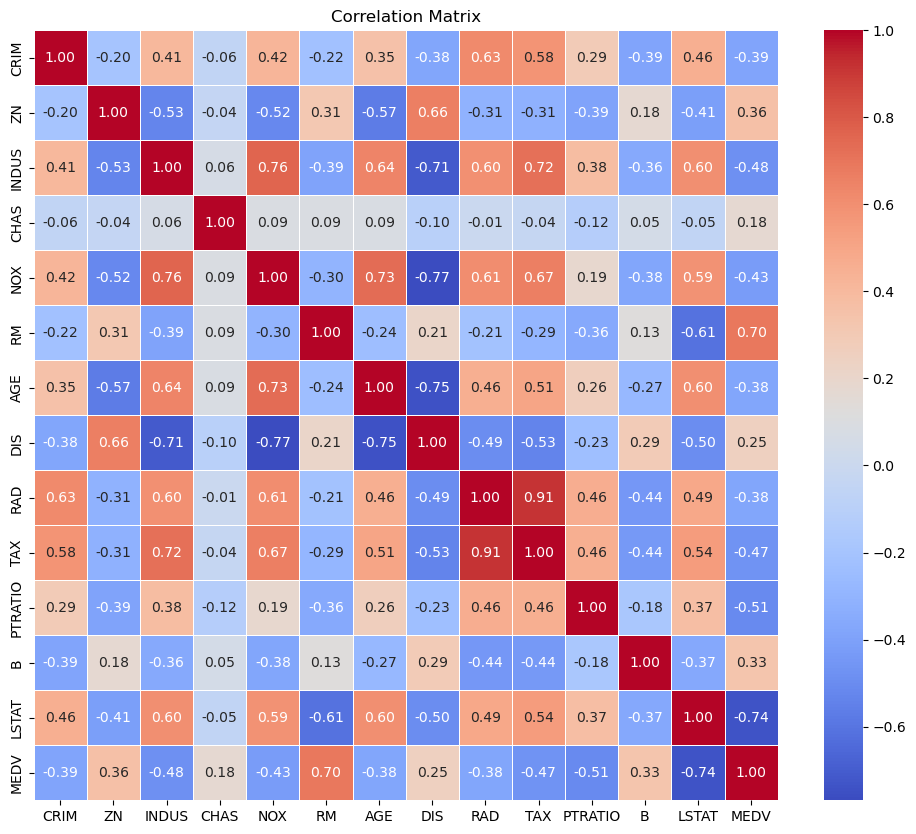

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# now by looking at heatmap it can be seen there is strong correlation exists between features 
# like higher percentage is 76% than 73%,72%,70% and less
# most highly correlated features RM with MEDV
# most negatively correlated are LSTAT and PTRATIO with MEDV

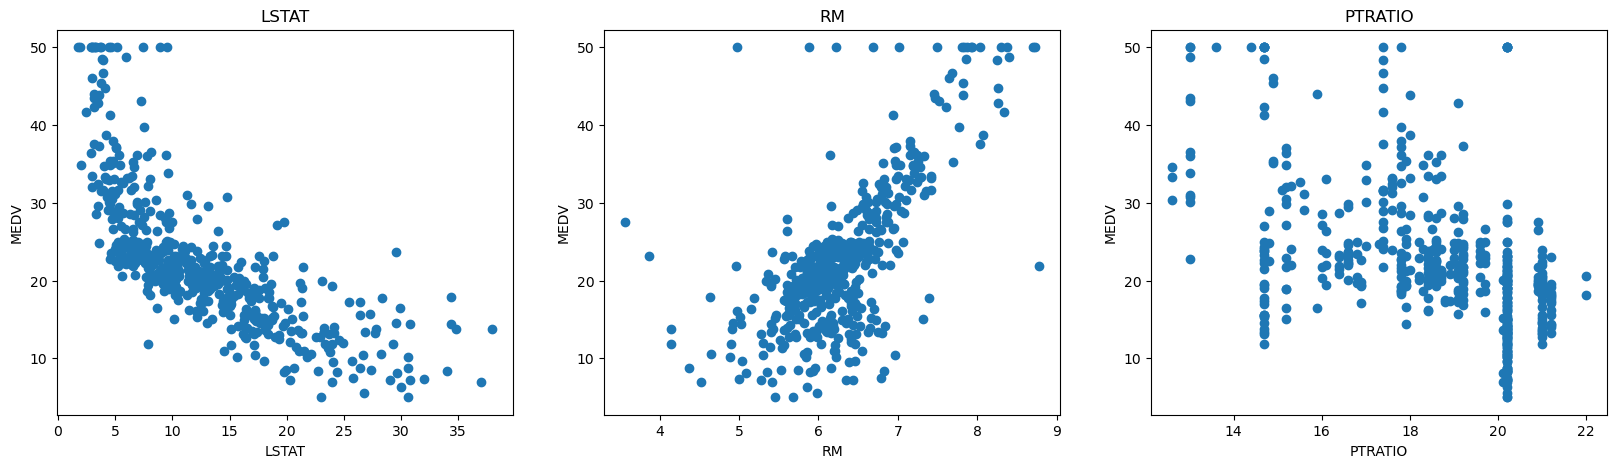

In [11]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [12]:
#first scatter plot is showing positive skewness a possible reason for this is that there are few 
#areas with very high LSTAT and very low MEDV, which could be due to poverty, crime,
#or other social issues.
#showing negative relationship between LSTAT and MEDV.
#If LSTAT increases, MEDV decreases
#we can see nonlinearity as well
#due to factors that affect the value of homes, such as the location, the size, the quality

In [13]:
#This plot shows a positive relationship between the average number of rooms per dwelling and the median value of homes.
#If RM increases, MEDV also increases, and vice versa.
#We can see relationship is linear, meaning that it follows a straight line.
#A possible explanation for this is that the number of rooms is a good indicator of the size and quality of a home,
#plot also shows data is negatively skewed, meaning that most of the values are concentrated on the right side of the distribution, and there are some outliers on the left side
#A possible reason for this is that there are few areas with very low RM and very high MEDV, which could be due to luxury, design, or other features of the homes

In [14]:
#this scatter plot shows a weak relationship between the PTRATIO and MEDV
#randomly scattered means no skewness or outliers 
#because PTRATIO is not a very important factor for the value of homes, 
#and that other variables, such as the quality of education, the income level, the crime rate.

Preprocessing Recommendations for Linear Regression:

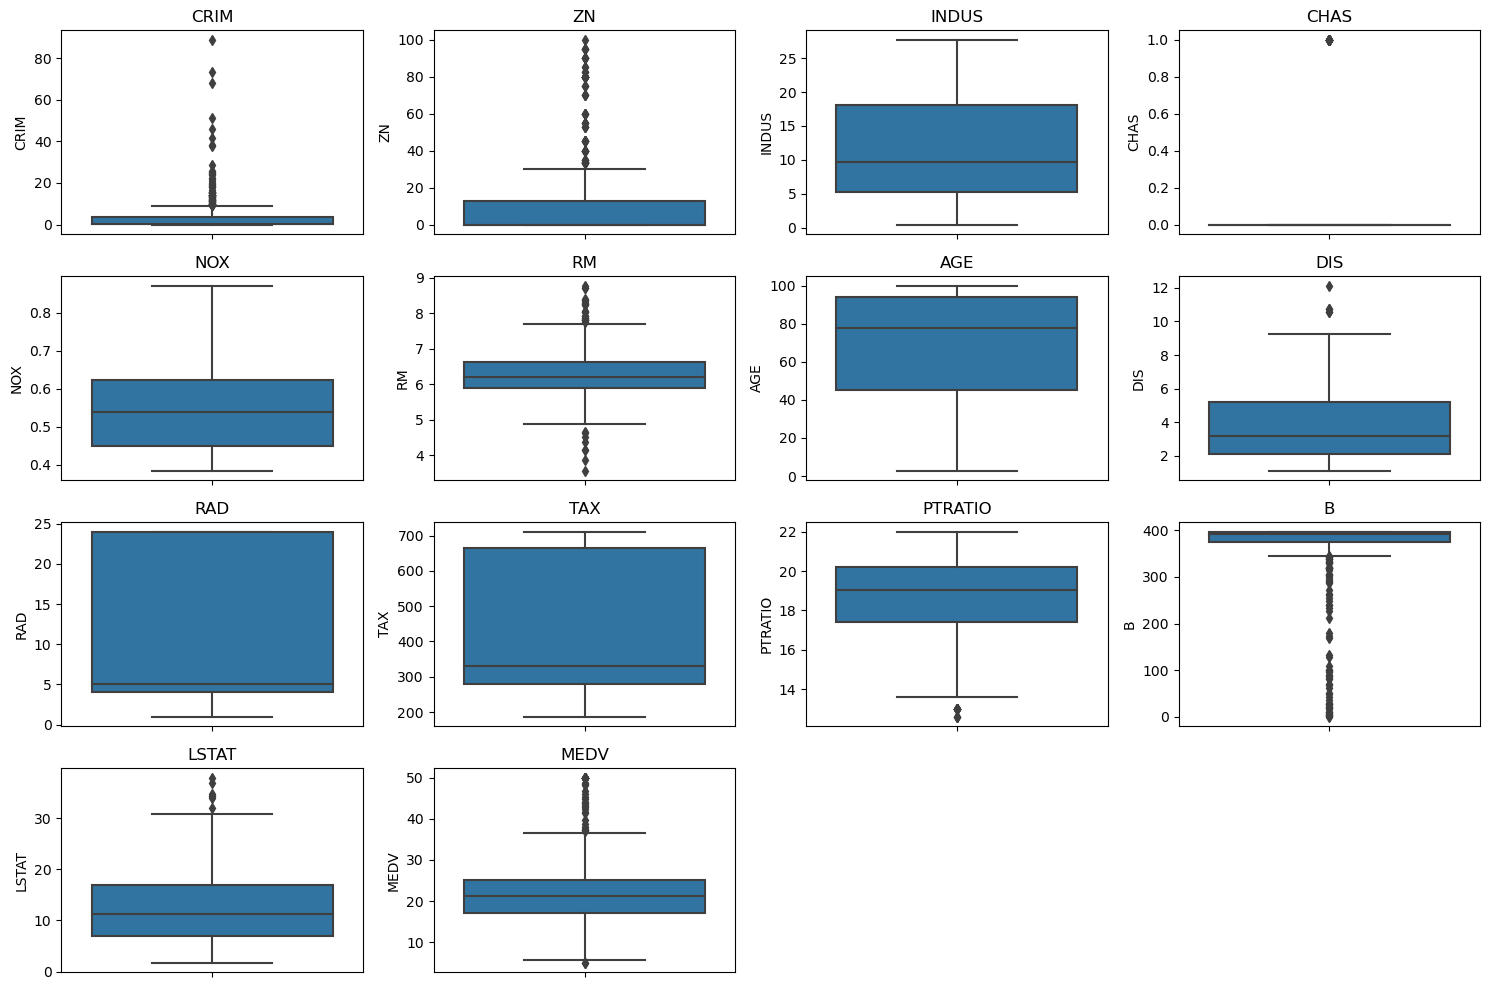

In [15]:
# Boxplots to visualize outliers in the dataset
plt.figure(figsize=(15, 10))

# Creating a boxplot for each feature in the DataFrame
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

Now lets create bins for columns that have too many outliers

In [16]:
# Since 'ZN' has many zero values, we'll use three bins and handle the zero values separately
df['ZN_binned'] = pd.cut(df['ZN'], bins=[-1, 0, 25, 100], labels=['Zero', 'Low', 'High'])

# Re-applying the binning for other columns
df['CRIM_binned'] = pd.qcut(df['CRIM'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['RM_binned'] = pd.qcut(df['RM'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])
df['B_binned'] = pd.qcut(df['B'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['LSTAT_binned'] = pd.qcut(df['LSTAT'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Displaying the first few rows of the dataset with the new binned columns
df[['CRIM', 'CRIM_binned', 'ZN', 'ZN_binned', 'RM', 'RM_binned', 'B', 'B_binned', 'LSTAT', 'LSTAT_binned']].head()

,CRIM,CRIM_binned,ZN,ZN_binned,RM,RM_binned,B,B_binned,LSTAT,LSTAT_binned
0,0.00632,Low,18.0,Low,6.575,Large,396.90,Very High,4.98,Low
1,0.02731,Low,0.0,Zero,6.421,Large,396.90,Very High,9.14,Medium
2,0.02729,Low,0.0,Zero,7.185,Very Large,392.83,High,4.03,Low
3,0.03237,Low,0.0,Zero,6.998,Very Large,394.63,High,2.94,Low
4,0.06905,Low,0.0,Zero,7.147,Very Large,396.90,Very High,5.33,Low


Now lets create boxplot for other columns

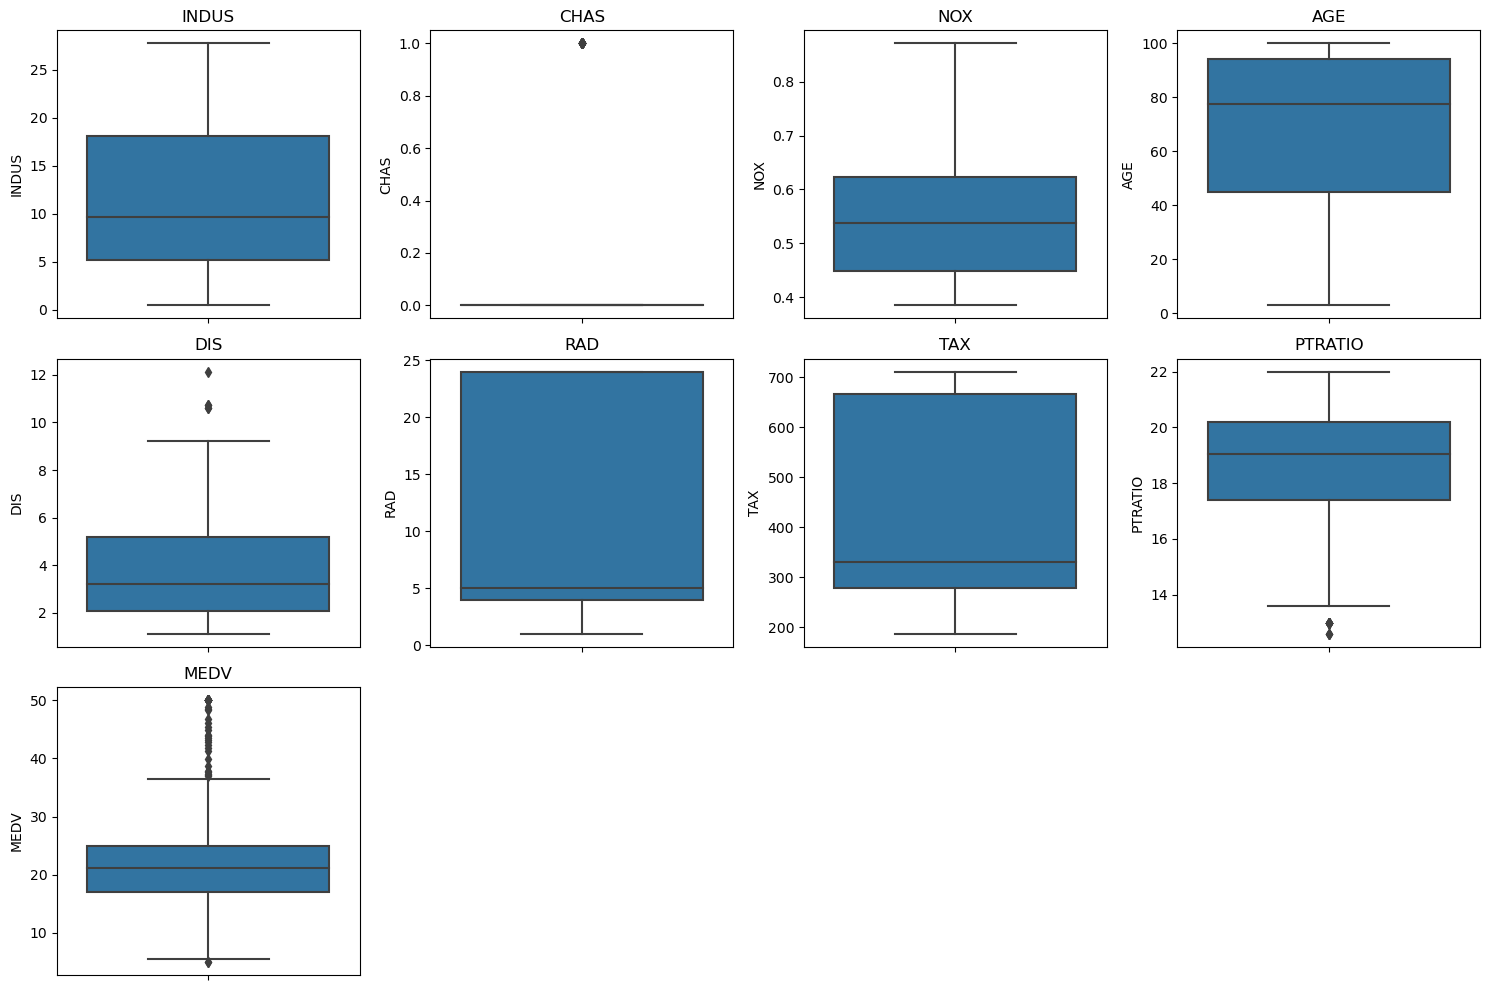

In [17]:
# Selecting the columns for the new boxplot analysis
excluded_columns = ['CRIM', 'ZN', 'RM', 'B', 'LSTAT', 'CRIM_binned', 'ZN_binned', 'RM_binned', 'B_binned', 'LSTAT_binned']
boxplot_columns = df.drop(columns=excluded_columns)

# Creating a new figure for the boxplots
plt.figure(figsize=(15, 10))

# Creating a boxplot for each remaining feature
for i, column in enumerate(boxplot_columns.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=boxplot_columns[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

There are very few outliers in the remaining columns let's just apply transformation

Label Encoding for 'RM_binned' and 'LSTAT_binned':

In [18]:
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
df['RM_binned_encoded'] = df['RM_binned'].map(ordinal_mapping)
df['LSTAT_binned_encoded'] = df['LSTAT_binned'].map(ordinal_mapping)

One-Hot Encoding for 'CRIM_binned', 'ZN_binned', and 'B_binned':

In [19]:
df = pd.get_dummies(df, columns=['CRIM_binned', 'ZN_binned', 'B_binned'], drop_first=True)

Data Scaling

Now deciding whether to scale data through standardization or normlization

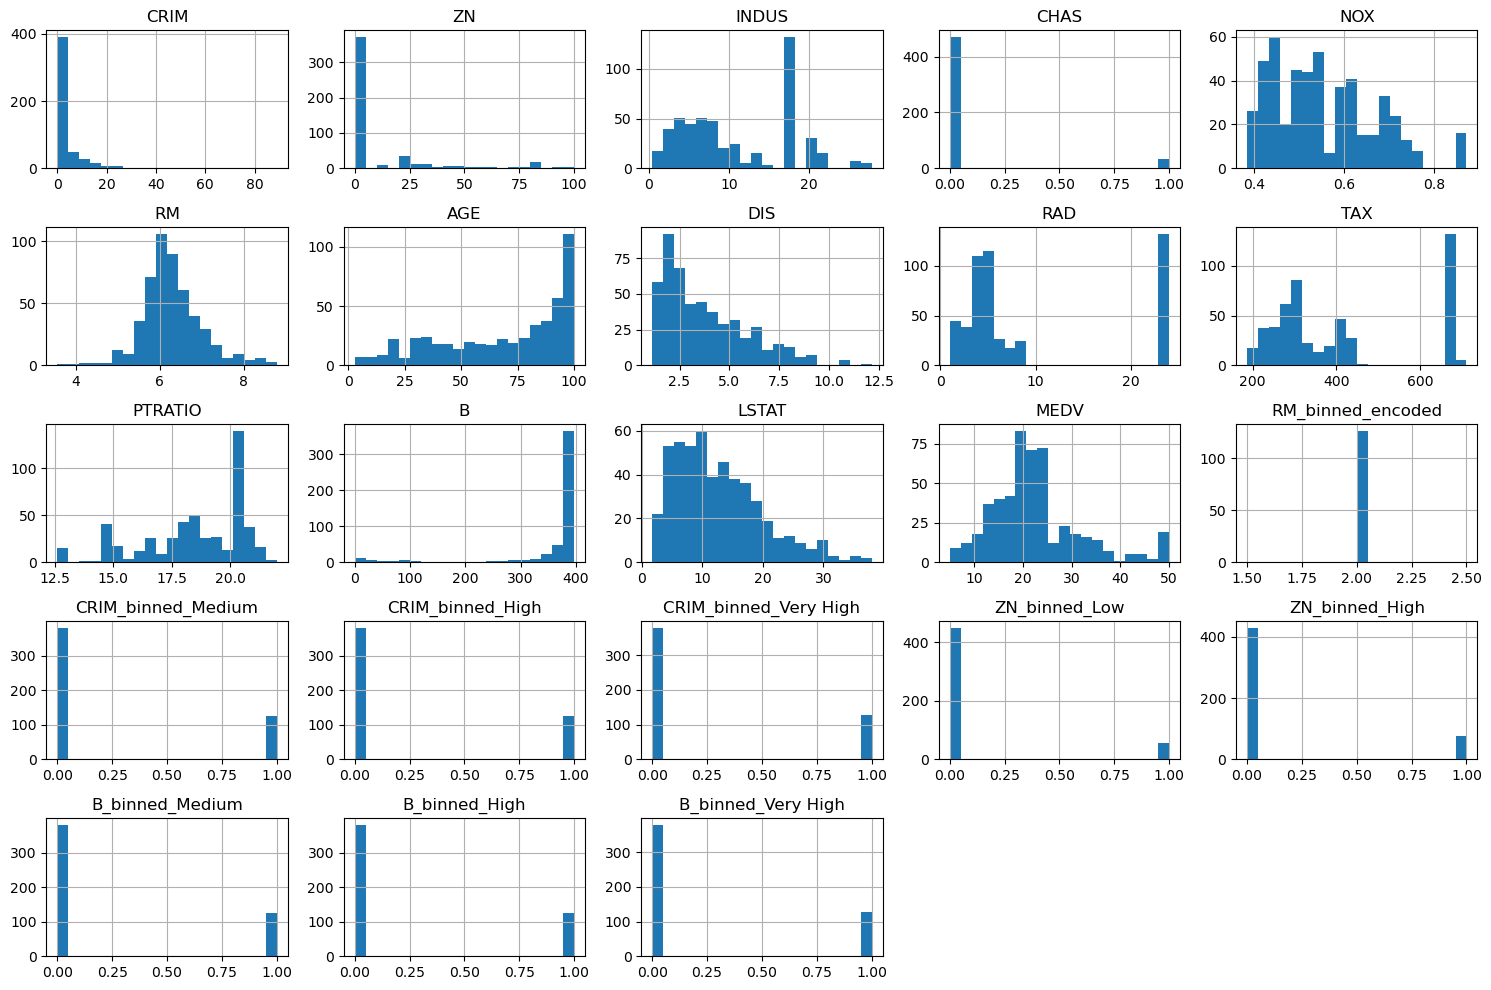

In [20]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

Except for RM column, data does not seem to be normally distributed, so let's apply normalization to rest of the columns and standardization to RM column

In [21]:
# Creating MinMaxScaler and StandardScaler objects
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

# Identifying numeric columns for normalization (excluding 'RM' and any non-numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
columns_to_normalize = [col for col in numeric_columns if col != 'RM']

# Applying normalization to the non-Gaussian distributed numeric columns
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])

# Applying standardization to the 'RM' column (Gaussian distributed)
df['RM'] = std_scaler.fit_transform(df[['RM']])

# Now, df contains the normalized and standardized values

In [22]:
df.isnull().sum()

CRIM                       0
ZN                         0
INDUS                      0
CHAS                       0
NOX                        0
RM                         0
AGE                        0
DIS                        0
RAD                        0
TAX                        0
PTRATIO                    0
B                          0
LSTAT                      0
MEDV                       0
RM_binned                  0
LSTAT_binned               0
RM_binned_encoded        380
LSTAT_binned_encoded       0
CRIM_binned_Medium         0
CRIM_binned_High           0
CRIM_binned_Very High      0
ZN_binned_Low              0
ZN_binned_High             0
B_binned_Medium            0
B_binned_High              0
B_binned_Very High         0
dtype: int64

# Linear Regression Model

Now applying linear regression only on features with high correlation with MEDV

In [23]:
# Selecting the features and target variable
X = df[['RM', 'LSTAT', 'PTRATIO']]
y = df['MEDV']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.013390102427447198
R-squared: 0.6302528487272826


Mean square value is 27.11 and r square is 63% 

In [24]:
df.isnull().sum()

CRIM                       0
ZN                         0
INDUS                      0
CHAS                       0
NOX                        0
RM                         0
AGE                        0
DIS                        0
RAD                        0
TAX                        0
PTRATIO                    0
B                          0
LSTAT                      0
MEDV                       0
RM_binned                  0
LSTAT_binned               0
RM_binned_encoded        380
LSTAT_binned_encoded       0
CRIM_binned_Medium         0
CRIM_binned_High           0
CRIM_binned_Very High      0
ZN_binned_Low              0
ZN_binned_High             0
B_binned_Medium            0
B_binned_High              0
B_binned_Very High         0
dtype: int64

In [25]:
#we need to handle these missing values before proceeding to calculate VIF  

In [26]:
# Drop the column with missing values
df = df.drop(columns=['RM_binned_encoded'])

# Only selecting columns with numeric values
df = df.select_dtypes(include=[np.number])

In [27]:
# Assuming your DataFrame is named df
# Exclude non-numeric columns and the target variable 'MEDV'
numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('MEDV')

# Add a constant to the DataFrame for the intercept
df_numeric_with_constant = add_constant(df[numeric_columns])

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df_numeric_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(df_numeric_with_constant.values, i) for i in range(df_numeric_with_constant.shape[1])]

print(vif_data)

                  Feature        VIF
0                   const  79.803290
1                    CRIM   1.848405
2                      ZN   7.938874
3                   INDUS   4.097810
4                    CHAS   1.090046
5                     NOX   4.971697
6                      RM   2.031256
7                     AGE   3.275664
8                     DIS   4.378859
9                     RAD  18.051353
10                    TAX   9.512645
11                PTRATIO   2.013615
12                      B   2.176767
13                  LSTAT   3.009579
14     CRIM_binned_Medium   2.157543
15       CRIM_binned_High   3.065763
16  CRIM_binned_Very High  18.326494
17          ZN_binned_Low   2.043175
18         ZN_binned_High   7.362709
19        B_binned_Medium   2.578150
20          B_binned_High   2.713923
21     B_binned_Very High   2.727535


In [28]:
#VIF greater than 10 suggests high multicollinearity that may be problematic
#RAD and CRIM_binned_very high has a VIF greater than 10
#Features range greater than 5 and less than 10 can be considered to have moderate multicollinearity
#Features with VIF values at or below 5 are typically considered to have low multicollinearity
#Most of features fall into this category, indicating low to moderate multicollinearity

Interpretation and Actions

In [29]:
#RAD and CRIM_binned_very show high multicollinearity
#It might be worth exploring if one of them can be removed or if their combined effect can be captured
#such as creating a new feature that combines their information Sometimes
#multicollinearity between these variables could be due to inherent relationships
#like areas with better highway accessibility having higher tax rates.
#The rest of the features do not show concerning levels of multicollinearity, so they can be retained in their current form.

In [30]:
# Splitting the data into training and testing sets
X = df.drop('MEDV', axis=1)  # Replace 'target_variable' with your actual target column name
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [31]:
# Linear Regression Model
lr_model = LinearRegression()
mse_lr = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
mse_ridge = train_and_evaluate_model(ridge_model, X_train, y_train, X_test, y_test)

# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
mse_lasso = train_and_evaluate_model(lasso_model, X_train, y_train, X_test, y_test)

# Output the MSE of each model
print("Linear Regression MSE:", mse_lr)
print("Ridge Regression MSE:", mse_ridge)
print("Lasso Regression MSE:", mse_lasso)

Linear Regression MSE: 0.0108596888803253
Ridge Regression MSE: 0.011412172807765086
Lasso Regression MSE: 0.02801958148145929


Correlation between RAD and CRIM_binned_Very High: 0.9516918323642841


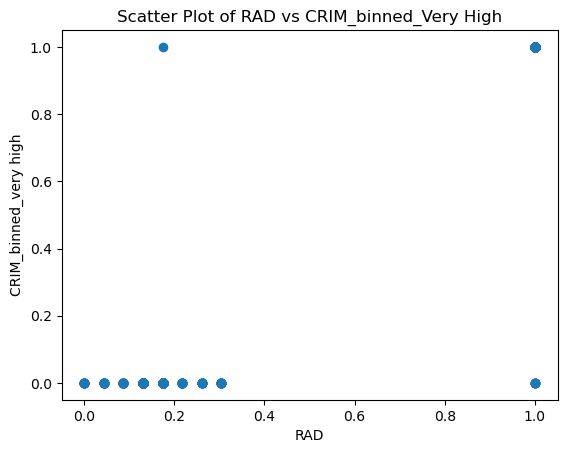

Model performance (MSE): 0.034967513603403604
                 Feature         VIF
0                  const    3.531869
1                    RAD   11.774655
2  CRIM_binned_Very High  140.090402
3        RADxcrim_binned  155.062303


In [32]:
# Analyzing the relationship
correlation = df['RAD'].corr(df['CRIM_binned_Very High'])
print("Correlation between RAD and CRIM_binned_Very High:", correlation)

# Scatter plot
plt.scatter(df['RAD'], df['CRIM_binned_Very High'])
plt.xlabel('RAD')
plt.ylabel('CRIM_binned_very high')
plt.title('Scatter Plot of RAD vs CRIM_binned_Very High')
plt.show()

# Creating a new combined feature (example: product of RAD and TAX)
df['RADxcrim_binned'] = df['RAD'] * df['CRIM_binned_Very High']
# Model assessment with the new feature
X = df[['RAD', 'CRIM_binned_Very High', 'RADxcrim_binned']]  # Include other predictors as needed
y = df['MEDV']  # Replace with your actual target variable
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
print("Model performance (MSE):", mean_squared_error(y, y_pred))

# VIF recalculation
df_with_constant = add_constant(df[['RAD', 'CRIM_binned_Very High', 'RADxcrim_binned']])
vif_data = pd.DataFrame()
vif_data['Feature'] = df_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

In [33]:
#Mean Squared Error (MSE) of the model is 0.03496 which is close to mse of lasso model
#VIF of 140 is extremely high, indicating that this variable is highly collinear with other #independent variables in your model
#VIF of 11.77 suggests moderate multicollinearity
#VIF of 155 is very high, even higher than RAD and CRIM_binned_Very High separately
#This suggests that the interaction term is highly collinear with other variables

Interpretation

In [ ]:
#MSE alone does not provide enough context for the overall model performance
#especially regarding multicollinearity 
#It's essential to compare this with the MSE of a model without the interaction term
#or with different feature engineering.